In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [40]:
!pip install tensorflow
print(tf.__version__)

2.7.0


In [41]:
# Loading MNIST data from keras .dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Shape of the numpy arrays 
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

Training = 60000 Images & Testing = 10000 Images. the images are grayscale and size is 28 x 28

print one of the dataset image 
print(X_train[10])
plt.imshow(X_train[10])
plt.show()
printing the label of the image as well
print(Y_train[10])
To display all unique numbers in the mnist dataset
print(np.unique(Y_train))

Inorder to reduce load over machine in order to process the images
which are having color in range 0-255, we reduce it into range of 0-1

In [42]:
X_train = X_train / 255
X_test = X_test / 255
# X_train = X_train.astype('float32') / 255
# X_test = X_test.astype('float32') / 255

# X_train = np.expand_dims(X_train, -1)
# X_test = np.expand_dims(X_test, -1)

In [43]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Flatten - we can't feed data as matrix so we convert it into single line using it.
The input shape is the size of the image

Dense - all the layers comes into previous or next layer, (no of neurons, activation function = relu)

relu = rectified linear unit
sigmoid

2 layers are used
The final layer is output layer so that the neurons of the previous layers are connected to this layer
The final layer should have total 10 neurons as we have a total of (0-9) 10 values

In [52]:
# Building the Neural Network
model = tf.keras.Sequential([
                                                  keras.layers.Flatten(input_shape=(28,28)), 
                                                  keras.layers.Dense(50, activation = 'relu'), 
                                                  keras.layers.Dense(50, activation = 'relu'), 
                                                  keras.layers.Dense(10, activation = 'sigmoid')])

In [53]:
# model.summary()
print(model.input_shape)

(None, 28, 28)


Optimizer is used to determine the most optimium model parameter

ex. linear regression w b

loss is used for label removing

metrics accuracy = no of correct prediction/ total number of data passed

In [56]:
# Compliing the model
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [57]:
# Train neural network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2954 - accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1412 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1049 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0843 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0703 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0591 - accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9829
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0448 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0398 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.034

The Training model accuracy is 98.9%

**Testing the Accuracy of the Model**

In [58]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 3s 6ms/step - loss: 0.1115 - accuracy: 0.9679
0.9678999781608582


The Testing model accuracy is 96.7%

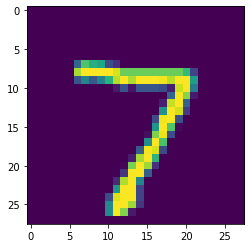

7


In [59]:
# To compare the first test image and label accordingly
plt.imshow(X_test[0])
plt.show()
print(Y_test[0])

Now, get the prediction of any image from the trained model
The predict function gives the probability of the image into all the available classes.
So, inorder to get the maximum probable class label as prediction, we have to use argmax of numpy.

In [61]:
y_prediction = model.predict(X_test)
print(y_prediction[1])

[5.7092286e-05 5.7223183e-01 9.9999821e-01 7.3567778e-02 6.7028527e-10
 7.4346066e-03 7.4371390e-05 4.3997034e-07 4.1767627e-02 1.2995269e-09]


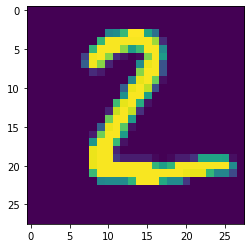

The prediction made by model is 2


In [67]:
predicted_label = np.argmax(y_prediction[1])
plt.imshow(X_test[1])
plt.show()
print('The prediction made by model is', predicted_label)

In [69]:
# Now to make the prediction probability of all the images into labels
y_prediction_labels = [np.argmax(i) for i in y_prediction]
print(y_prediction_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Here, 

Y_test stands for the actual labels provided and 

The Y_prediction_labels stands for the labels predicted by the model

In [70]:
# Now create the confusion matrix
conf_mat = confusion_matrix(Y_test, y_prediction_labels)
print(conf_mat)

tf.Tensor(
[[ 961    0    0    2    0    5    7    2    2    1]
 [   0 1121    4    0    0    2    3    1    3    1]
 [   6    1  999    6    2    3    3    5    6    1]
 [   0    0    7  948    0   44    0    5    5    1]
 [   0    0    3    1  955    2    5    0    1   15]
 [   2    0    0    3    1  878    4    1    2    1]
 [   2    3    1    1    4   19  926    0    2    0]
 [   1    3   12    2    1    1    0 1001    0    7]
 [   6    0    7    9    5   17    2    3  919    6]
 [   0    2    0    7   12    8    0    7    3  970]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted labels')

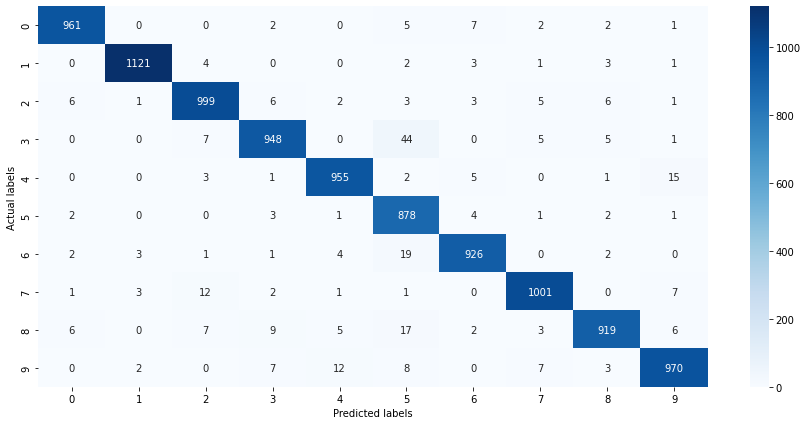

In [95]:
# generating heatmap for the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='PiYG')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')

Building a predictive Model

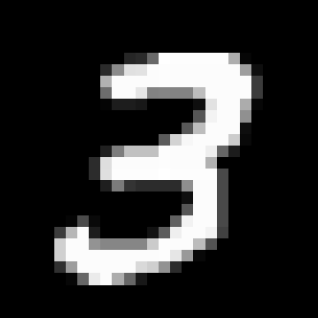

In [138]:
image_path = '/content/download (1).png'
input_image = cv2.imread(image_path)
# type(input_image)
# print(input_image)
cv2_imshow(input_image)

In [139]:
grayscale_img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale_img.shape

(318, 318)

In [140]:
resized_img = cv2.resize(grayscale_img, (28, 28))
resized_img.shape

(28, 28)

In [141]:
cv2_imshow(resized_img)

In [142]:
# Now make the values in range of 0-1
resized_img = resized_img / 255
final_img = np.reshape(resized_img, [1, 28, 28])

[[2.5451741e-10 2.5480463e-07 1.4987100e-06 1.0000000e+00 4.0192658e-09
  6.5019339e-02 6.0905382e-14 9.7936929e-05 3.4930110e-03 9.5853209e-04]]
The digit predicted by the model is:  3


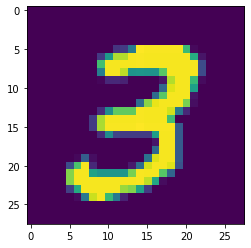

In [144]:
# Now making prediction
input_prediction = model.predict(final_img)
print(input_prediction)
plt.imshow(resized_img)
print('The digit predicted by the model is: ', np.argmax(input_prediction))

Predictive System

Enter the image path: /content/download (1).png


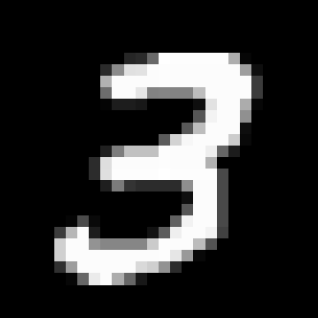

The digit predicted by the model is:  3


In [146]:
image_path = input('Enter the image path: ')
input_image = cv2.imread(image_path)
cv2_imshow(input_image)
grayscale_img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale_img.shape
resized_img = cv2.resize(grayscale_img, (28, 28))
resized_img.shape
resized_img = resized_img / 255
final_img = np.reshape(resized_img, [1, 28, 28])
input_prediction = model.predict(final_img)
print('The digit predicted by the model is: ', np.argmax(input_prediction))